In [315]:
# Colabis failidega opereerimiseks mõeldud moodulite import ja ketta ühendamine
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

import os
import pandas as pd
import csv 
import geopandas as gpd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")

test = 'autod.csv'

andmed = pd.read_csv(test, delimiter=";",skiprows=[0,1,2])

andmed.info()


  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-eeaw4z3m
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-eeaw4z3m
  Created wheel for geopandas: filename=geopandas-0.8.0+72.ge506de5-py2.py3-none-any.whl size=973052 sha256=e0a435f9ec6b23bf69aeada06041a4adae117c936573af6d6a7d49266750e481
  Stored in directory: /tmp/pip-ephem-wheel-cache-sktc3dlh/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,6,7,10,12,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694098 entries, 0 to 694097
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Üldine staatus   686289 non-null  object 
 1   Kategooria       686289 non-null  object 
 2   Mark             686289 non-null  object 
 3   Mudel            686289 non-null  object 
 4   Keretüüp         686289 non-null  object 
 5   Esm reg aasta    686279 non-null  float64
 6   Värv             686289 non-null  object 
 7   Mootori tüüp     686289 non-null  object 
 8   CO2              370166 non-null  float64
 9   Mootori maht     686263 non-null  float64
 10  Mootori võimsus  686264 non-null  object 
 11  Tühimass         686275 non-null  float64
 12  Käigukasti tüüp  554574 non-null  object 
 13  Telgi kokku      686274 non-null  float64
 14  Maakond          686289 non-null  object 
 15  Linn             686290 non-null  object 
 16  Arv              686290 non-null  floa

180902.0 625022.0
805924.0


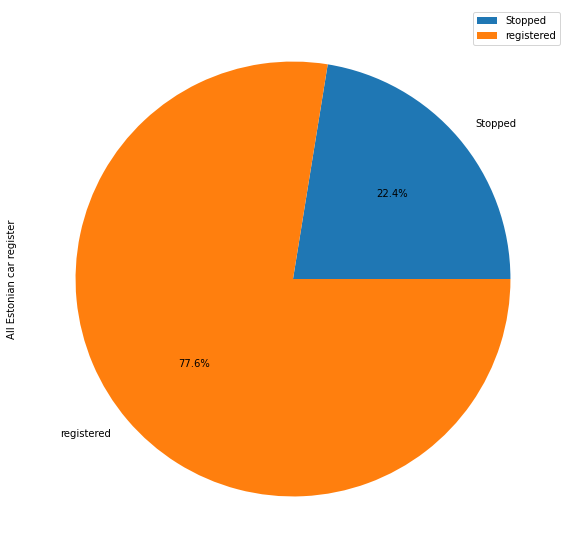

In [316]:
#couting stopped and registred cars
stopped_count = andmed.loc[andmed['Üldine staatus'] == 'PEATATUD', 'Arv'].sum()
registred_count = andmed.loc[andmed['Üldine staatus'] == 'REGISTREERITUD', 'Arv'].sum()

#pie plot
df = pd.DataFrame({'All Estonian car register':[stopt_count,registred_count]},index=['Stopped','registered'])
plot = df.plot.pie(y='All Estonian car register', figsize=(10, 10), subplots=True,autopct='%1.1f%%')


print(stopt_count, registred_count)
print(stopped_count+registred_count)

# In Estonia there are 805924 cars of which 180902 car statuses are stopped and 625022 statuses are registered. 

In [323]:
# stopped and registred cars
registred_data = andmed.loc[andmed['Üldine staatus'] == 'REGISTREERITUD']
stopped_data = andmed.loc[andmed['Üldine staatus'] == 'PEATATUD']

#sum cars count by town
town_data = registred_data.groupby(['Linn'])['Arv'].agg('sum')
town_data = town_data.sort_values(ascending=False)
print(town_data)
###normalizing
#min_max_scaler = preprocessing.MinMaxScaler()
#x = test.values
#x = x.reshape(-1, 1)
#x_scaled = min_max_scaler.fit_transform(x)



Linn
Määramata            307522.0
Tallinn              176812.0
Tartu linn            39411.0
Pärnu linn            22224.0
Narva linn            16996.0
Kohtla-Järve linn     11436.0
Viljandi linn          7982.0
Rakvere linn           6958.0
Maardu linn            6637.0
Haapsalu linn          6513.0
Võru linn              5763.0
Paide linn             5057.0
Keila linn             4580.0
Sillamäe linn          4305.0
Narva-Jõesuu linn      2035.0
Loksa linn              791.0
Name: Arv, dtype: float64


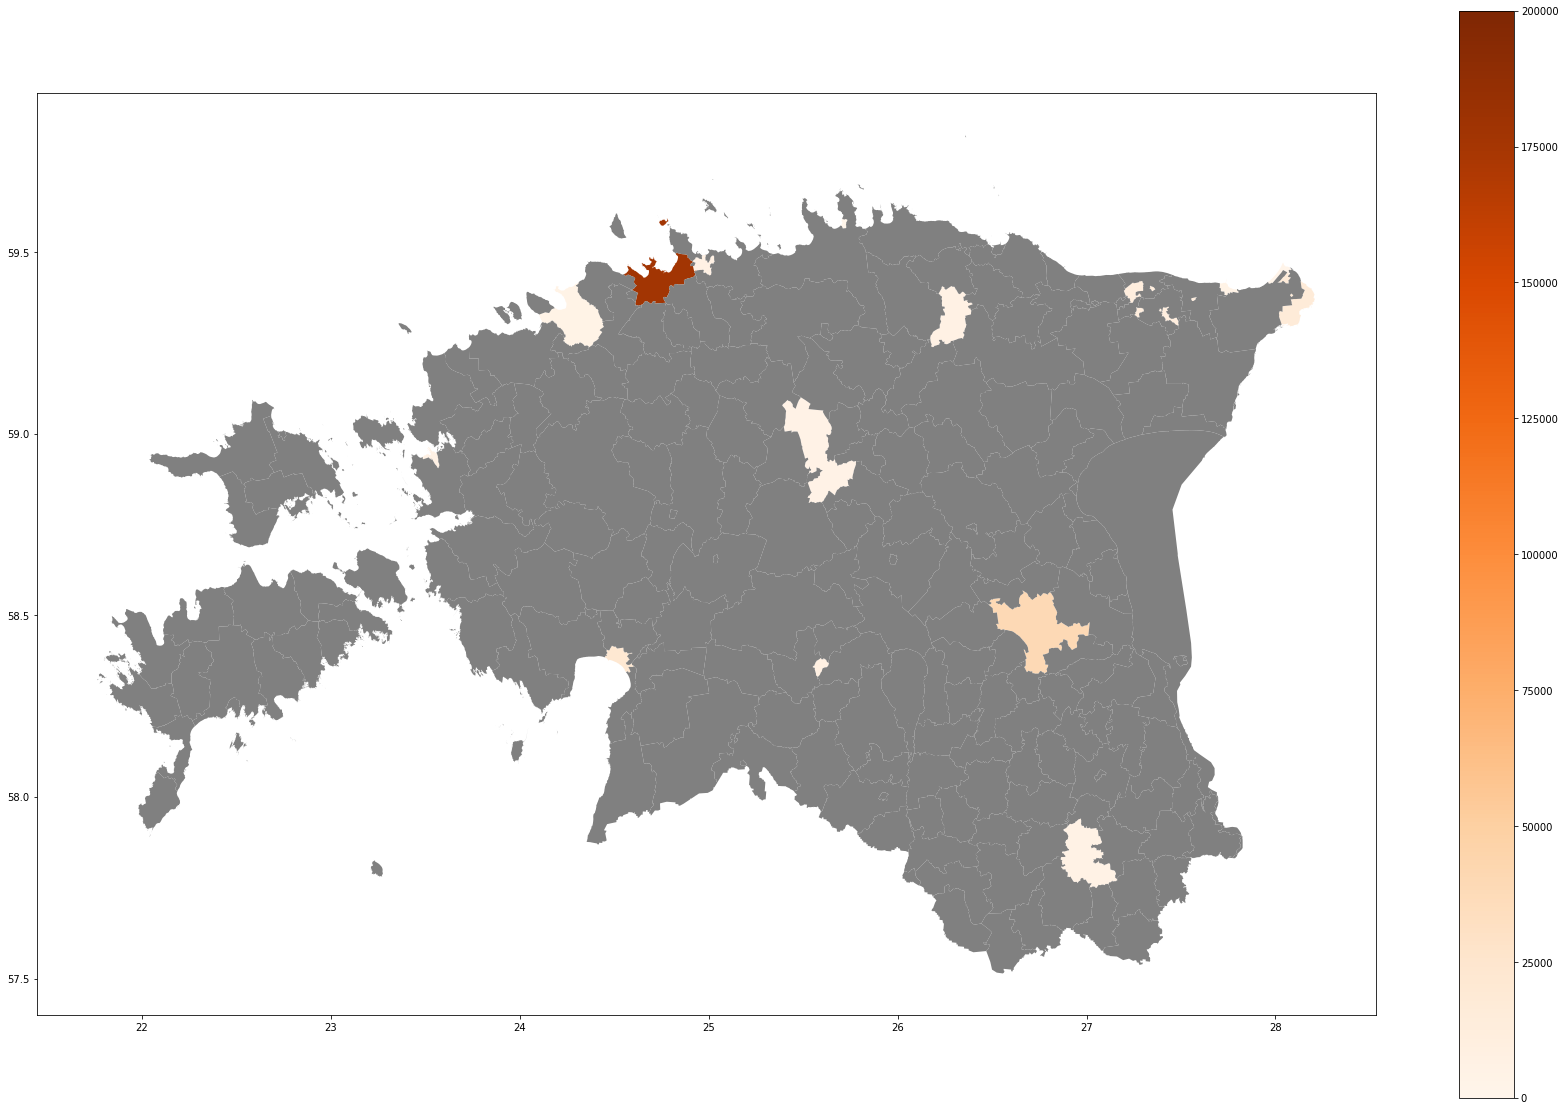

In [320]:
#est map_2
map_2 = "/content/data/gadm36_EST_2.shp"
estMap2 = gpd.read_file(map2)

#convert to dict
count_dict = town_data.to_dict()

#processing
for key, value in count_dict.items():
  if(key != "Määramata"):
    if(key != 'Tallinn'):
      key = key.replace("linn","")
      key = key.replace(" ","")
    estMap2.loc[estMap2['NAME_2'] == key, 'arvud'] = value

estMap2.plot(column='arvud',figsize=(30, 20),legend=True,cmap='Oranges', vmin=0, vmax=200000,missing_kwds= dict(color = "gray") )



1.   Määramata 307522
2.   Tallinn 176812
3.   Tartu 39411
4.   Pärnu 22224
5.   Narva 16996
6.   Kohtla-Järve 11436
7.   Viljandi 7982 
8.   Rakvere 6958
9.   Maardu 6637 
10.  Haapsalu 6513
11.  Võru 5763
12.  Paide 5057
13.  Keila 4580
14.  Sillamäe 4305
15.  Narva-Jõesuu 2035
16.  Loksa 791 


Maakond
HARJU MAAKOND         328715.0
TARTU MAAKOND          88681.0
IDA-VIRU MAAKOND       64004.0
PÄRNU MAAKOND          53328.0
LÄÄNE-VIRU MAAKOND     38016.0
VILJANDI MAAKOND       32282.0
VÕRU MAAKOND           27136.0
RAPLA MAAKOND          24685.0
SAARE MAAKOND          23751.0
MÄÄRAMATA              22362.0
PÕLVA MAAKOND          20832.0
JÄRVA MAAKOND          20707.0
VALGA MAAKOND          19719.0
JÕGEVA MAAKOND         19679.0
LÄÄNE MAAKOND          14378.0
HIIU MAAKOND            7649.0
Name: Arv, dtype: float64


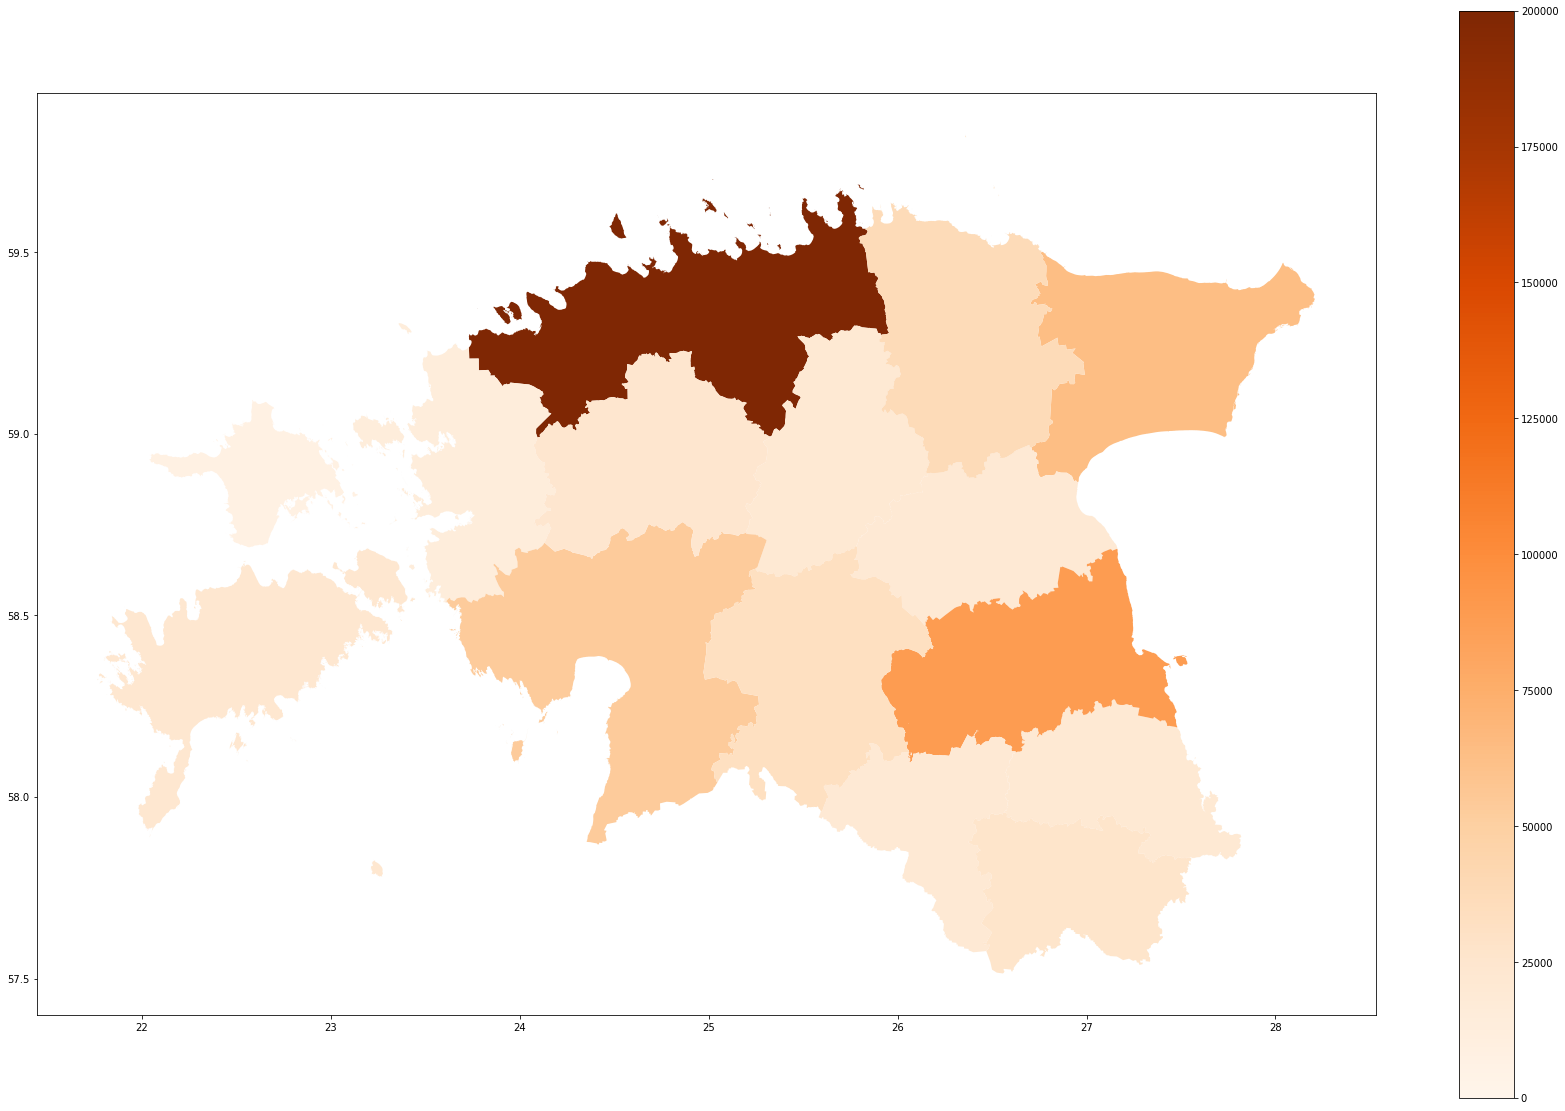

In [347]:
#estmap1
map1 = "/content/data/gadm36_EST_1.shp"
estMap1 = gpd.read_file(map1)

#couting 
county_data = andmed.groupby(['Maakond'])['Arv'].agg('sum')
county_data = county_data.sort_values(ascending=False)
print(county_data)

#convert to dict
county_dict = county_data.to_dict()


for key, value in county_dict.items():
  if(key != "MÄÄRAMATA"):
    key = key.replace("MAAKOND","")
    key = key.replace(" ","")
    key = key.lower()
    estMap1.loc[maakonnad['NAME_1'].str.lower() == key, 'arvud'] = value



estMap1.head(20)
estMap1.plot(column='arvud',figsize=(30, 20),legend=True, cmap="Oranges", vmin=0, vmax=200000)




1. HARJU MAAKOND&emsp;        265898
2. TARTU MAAKOND&emsp;         70554
3. IDA-VIRU MAAKOND&emsp;       48164
4. PÄRNU MAAKOND&emsp;          41134
5. LÄÄNE-VIRU MAAKOND&emsp;     28872
6. VILJANDI MAAKOND&emsp;       24483
7. VÕRU MAAKOND&emsp;           20003
8. SAARE MAAKOND&emsp;          19015
9. RAPLA MAAKOND&emsp;          18282
10. JÄRVA MAAKOND&emsp;          15389
11. PÕLVA MAAKOND&emsp;          14898
12. JÕGEVA MAAKOND&emsp;         14732
13. VALGA MAAKOND&emsp;          14407
14. MÄÄRAMATA&emsp;              11815
15. LÄÄNE MAAKOND&emsp;          11315
16. HIIU MAAKOND&emsp;            6061



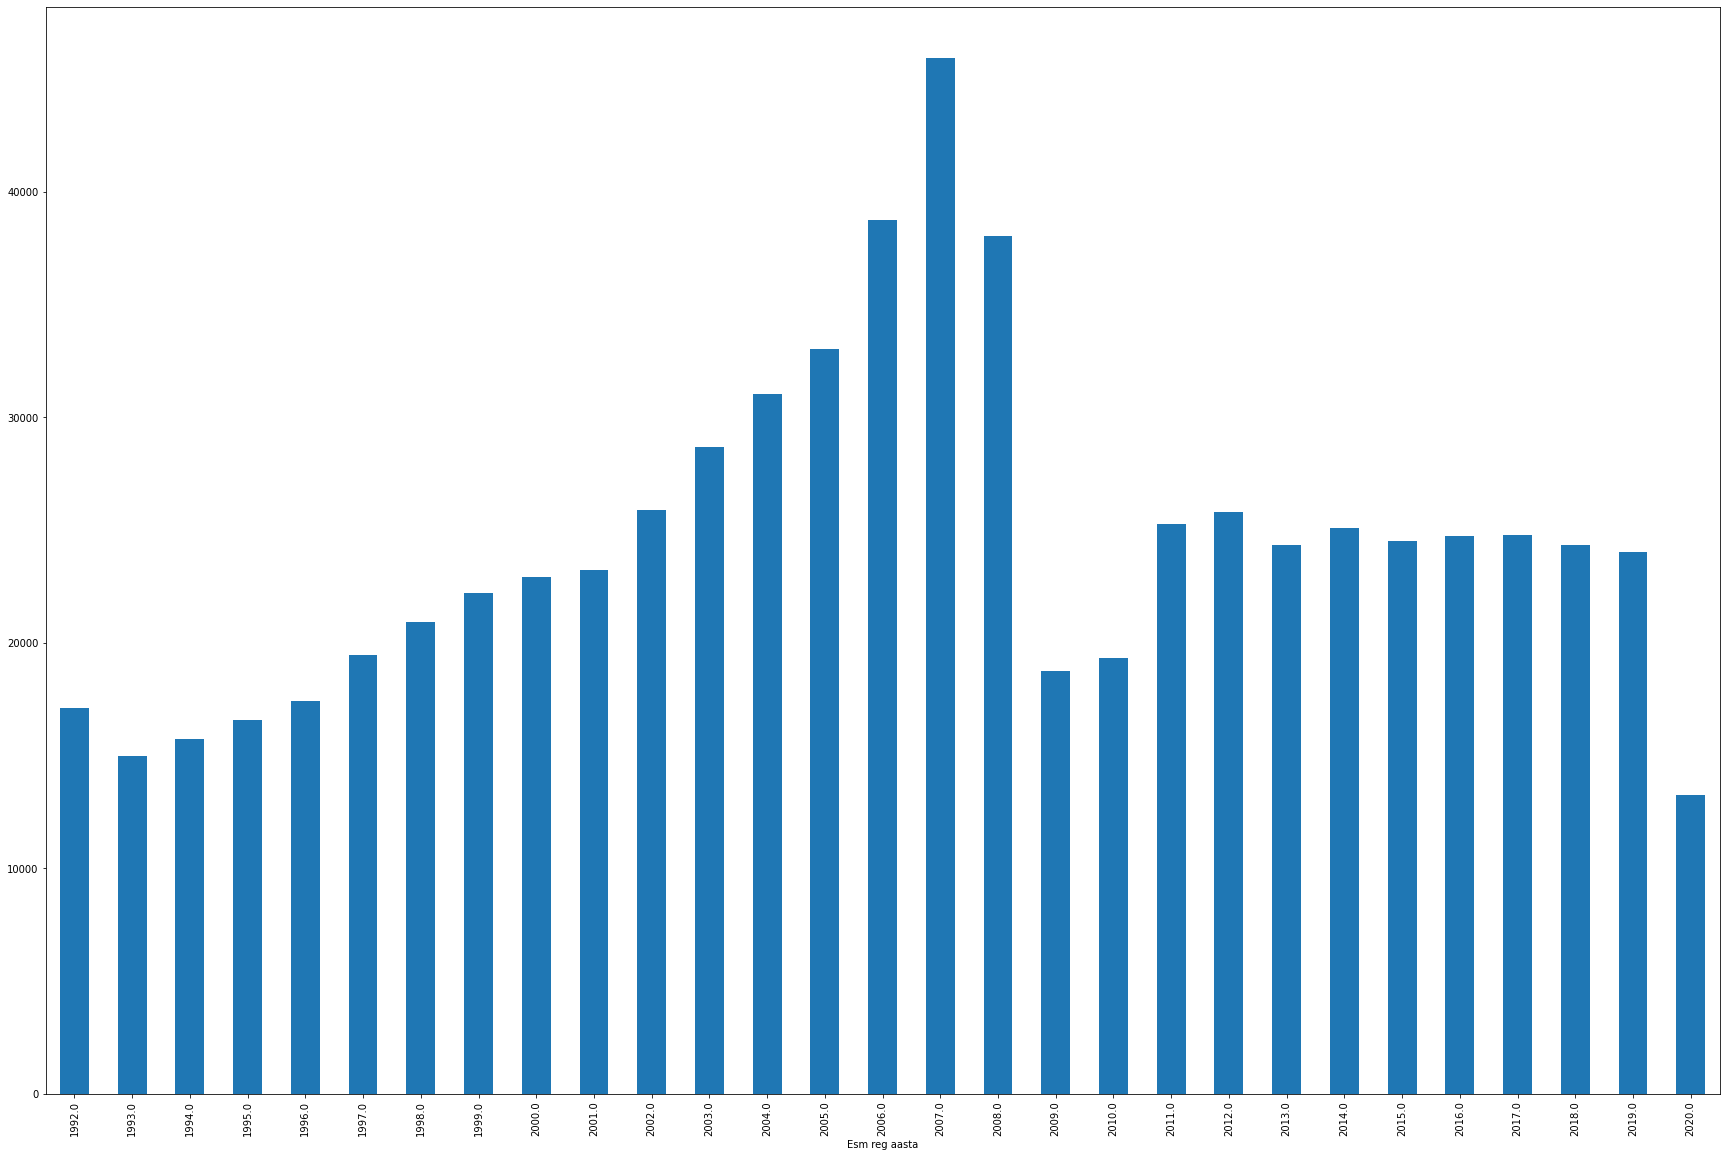

In [353]:

estRegistred = andmed.loc[andmed['Esm reg aasta'] >= 1992]
counts = estRegistred .groupby(['Esm reg aasta'])['Arv'].agg('sum')
counts.plot.bar(figsize=(30, 20))